<a href="https://colab.research.google.com/github/Jeongbin-Heo/AI_12_Section2_Project/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pdp

In [ ]:
!pip install shap

In [ ]:
!pip install --upgrade category_encoders

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*   Company- String - 노트북 제조 회사
*   Product -String - 노트북 제조 회사
*   TypeName -String - 타입 (노트북, 울트라북, 게이밍, etc.)
*   Inches -Numeric- 화면 사이즈(인치)
*   ScreenResolution -String- 해상도
*   Cpu- String - CPU
*   Ram -String - 램
*   Memory -String- 메모리 용량
*   GPU -String- GPU
*   OpSys -String- OS(맥, 윈도우)
*   Weight -String- 무게
*   Price_euros -Numeric- 가격(단위 : Euro)


In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/AIB/Section2/laptop_price.csv', encoding = 'ISO-8859-1')
df.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [53]:
# laptop_ID는 삭제
df = df.drop(columns = 'laptop_ID')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# 평가지표 및 기준모델 선정


*   평가지표 : R2 Score
*   기준 모델 : Price_euros의 평균값



In [54]:
from sklearn.metrics import r2_score

price = df['Price_euros']
mean = df['Price_euros'].mean()
baseline = [mean] * len(df)

print('기준모델의 r2 Score :', r2_score(price, baseline))

기준모델의 r2 Score : 2.220446049250313e-16


# 데이터 전처리

In [55]:
# 결측치 처리
df.isnull().sum() 
# 결측치는 존재하지 않으므로 결측치를 처리하는 과정은 생략

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [56]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [57]:
# 범주형 데이터의 cardinality를 확인
df.select_dtypes(exclude = ['float64', 'int64']).describe()
# Product의 cardinality가 너무 높으므로 삭제, 나머지도 조정이 필요함

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,618,6,40,118,9,39,110,9,179
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,30,727,507,190,619,412,281,1072,121


In [58]:
# Product는 cardinality가 너무 높으므로 삭제
df = df.drop(columns = 'Product')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Screen Resolution 처리**

ScreenHeight, ScreenWidth 추가

In [59]:
df['Screen Width'] = df['ScreenResolution']
df['Screen Height'] = df['ScreenResolution']

def width(x) : 
  if x[-5] == 'x' :
    return int(x[-9:-5])
  else :
    return int(x[-8:-4])

def height(x) :
  if x[-5] == 'x' :
    return int(x[-4:])
  else :
    return int(x[-3:])

df['Screen Width'] = df['Screen Width'].apply(width)
df['Screen Height'] = df['Screen Height'].apply(height)

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Screen Width', 'Screen Height',
         'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']]

df.head()

,Company,TypeName,Inches,ScreenResolution,Screen Width,Screen Height,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560,1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,1440,900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,1920,1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2880,1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560,1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [60]:
df['Touchscreen'] = df['ScreenResolution']

def touch(x) :
  if 'Touchscreen' in x :
    return 1
  else :
    return 0

df['Touchscreen'] = df['Touchscreen'].apply(touch)

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Screen Width', 'Screen Height', 'Touchscreen',
         'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']]

df.head()

,Company,TypeName,Inches,ScreenResolution,Screen Width,Screen Height,Touchscreen,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560,1600,0,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,1440,900,0,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,1920,1080,0,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2880,1800,0,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2560,1600,0,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


'ScreenResolution'은 삭제

In [61]:
df = df.drop(columns = 'ScreenResolution')

df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,1920,1080,0,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Cpu 처리**

In [62]:
df['Cpu'].unique()
# 제조회사는 Intel, AMD 그리고 기타

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

Cpu GHz라는 새로운 feature 생성

In [63]:
df['Cpu GHz'] = df['Cpu']

def ghz(x):
  if '.' in x :
    return x[-7:]
  else :
    return x[-5:]

def tofloat(x):
  if ' ' in x :
    x = x.replace(' ', '')
    x = x.replace('GHz', '')
    return float(x)
  else :
    x = x.replace('GHz', '')
    return float(x)

df['Cpu GHz'] = df['Cpu GHz'].apply(ghz).apply(tofloat)

df = df[['Company', 'TypeName', 'Inches', 'Screen Width', 'Screen Height', 'Touchscreen', 
         'Cpu', 'Cpu GHz','Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']]

df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu,Cpu GHz,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,Intel Core i5 2.3GHz,2.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,Intel Core i5 1.8GHz,1.8,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,1920,1080,0,Intel Core i5 7200U 2.5GHz,2.5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,Intel Core i7 2.7GHz,2.7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,Intel Core i5 3.1GHz,3.1,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Cpu는 삭제

In [64]:
df = df.drop(columns = 'Cpu')

df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu GHz,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,2.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,1.8,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,1920,1080,0,2.5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,2.7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,3.1,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Ram 처리**

GB 지우고 정수형으로 출력

In [65]:
def ram(x) :
  return int(x.replace('GB', ''))

df['Ram'] = df['Ram'].apply(ram)
df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu GHz,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,1920,1080,0,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Memory 처리**

In [66]:
df['Memory'].unique()
# 타입은 SSD, HDD, Flash Storage, Hybrid, Multi('+'가 붙은 것들)

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

Memory Size라는 feature를 새로 생성

In [67]:
# df2 = df.copy()
df['Memory Size'] = df['Memory']

# 1.0TB와 같이 표시되어 있는 값을 1TB와 같이변환
def transform(x) :
  if '.0' in x :
    return x.replace('.0', '')
  else :
    return x

# GB와 TB(1000TB)의 단위를 통일
def gb(x) : 
  if 'GB' in x :
    return x.replace('GB', '')
  else :
    return x

def tb(x) : 
  if 'TB' in x :
    return x.replace('TB', '000')
  else :
    return x

# 최종적으로 총 메모리 용량의 합계를 계산
def delete(x) : 
  import re
  x = re.sub(r'[a-zA-Z]', '', x) # 알파벳을 모두 삭제
  x = x.replace(' ', '') # 공백을 삭제
  if '+' in x :
    a, b = x.split('+')
    return int(a) + int(b)
  else : 
    return int(x)

df['Memory Size'] = df['Memory Size'].apply(transform).apply(gb).apply(tb).apply(delete)

df = df[['Company', 'TypeName', 'Inches', 'Screen Width', 'Screen Height', 'Touchscreen', 
         'Cpu GHz', 'Ram', 'Memory', 'Memory Size', 'Gpu', 'OpSys', 'Weight', 'Price_euros']]

df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu GHz,Ram,Memory,Memory Size,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,2.3,8,128GB SSD,128,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,1.8,8,128GB Flash Storage,128,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,1920,1080,0,2.5,8,256GB SSD,256,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,2.7,16,512GB SSD,512,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,3.1,8,256GB SSD,256,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Memory Type이라는 feature를 새로 생성

In [68]:
# 타입은 SSD, HDD, Flash Storage, Hybrid, Multi('+'가 붙은 것들)

df['Memory Type'] = df['Memory']

def type(x) :
  if '+' in x :
    return 'Multi'
  elif 'SSD' in x :
    return 'SSD'
  elif 'HDD' in x :
    return 'HDD'
  elif 'Flash Storage' in x :
    return 'Flash Storage'
  elif 'Hybrid' in x :
    return 'Hybrid'
  else :
    return 'Others'

df['Memory Type'] = df['Memory Type'].apply(type)

df = df[['Company', 'TypeName', 'Inches', 'Screen Width', 'Screen Height', 'Touchscreen', 
         'Cpu GHz', 'Ram', 'Memory', 'Memory Size', 'Memory Type', 'Gpu', 'OpSys', 'Weight', 'Price_euros']]

df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu GHz,Ram,Memory,Memory Size,Memory Type,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,2.3,8,128GB SSD,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,1.8,8,128GB Flash Storage,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,1920,1080,0,2.5,8,256GB SSD,256,SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,2.7,16,512GB SSD,512,SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,3.1,8,256GB SSD,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Memory는 삭제

In [69]:
df = df.drop(columns = 'Memory')

df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu GHz,Ram,Memory Size,Memory Type,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,2.3,8,128,SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,1.8,8,128,Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,1920,1080,0,2.5,8,256,SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,2.7,16,512,SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,3.1,8,256,SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


**Gpu 처리**

In [70]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

Gpu 생산 브랜드로 데이터를 변환

In [71]:
def gpu(x) :
  if 'Intel' in x :
    return 'Intel'
  elif 'Nvidia' in x :
    return 'Nvidia'
  elif 'AMD' in x :
    return 'AMD'
  else :
    return 'Others'

df['Gpu'] = df['Gpu'].apply(gpu)

df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu GHz,Ram,Memory Size,Memory Type,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,2.3,8,128,SSD,Intel,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,1.8,8,128,Flash Storage,Intel,macOS,1.34kg,898.94
2,HP,Notebook,15.6,1920,1080,0,2.5,8,256,SSD,Intel,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,2.7,16,512,SSD,AMD,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,3.1,8,256,SSD,Intel,macOS,1.37kg,1803.60


**OpSys 처리**

In [72]:
df['OpSys'].unique()
# cardinality가 적어서 크게 이용할 것이 없어보임

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

**Weight 처리**

kg을 없애고 float로 변환

In [73]:
def tofloat2(x) : 
  return float(x.replace('kg', ''))

df = df.copy()
df['Weight'] = df['Weight'].apply(tofloat2)

df.head()

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu GHz,Ram,Memory Size,Memory Type,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,2.3,8,128,SSD,Intel,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,1.8,8,128,Flash Storage,Intel,macOS,1.34,898.94
2,HP,Notebook,15.6,1920,1080,0,2.5,8,256,SSD,Intel,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,2.7,16,512,SSD,AMD,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,3.1,8,256,SSD,Intel,macOS,1.37,1803.60


# EDA

**각 특성별로 가격에 영향이 얼마나 있는지 확인**

1. Company

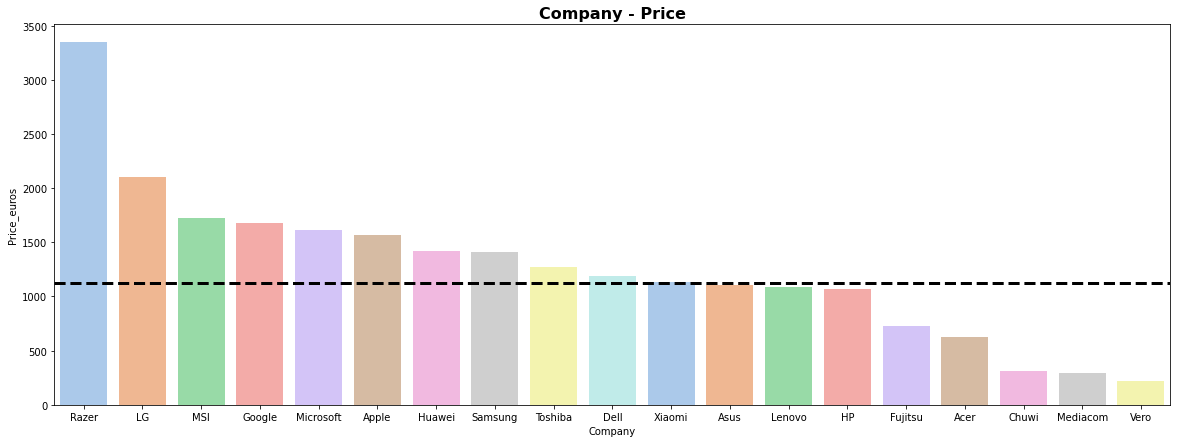

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

company = pd.DataFrame(df.groupby('Company')['Price_euros'].mean()).reset_index().sort_values('Price_euros', ascending = False)

plt.figure(figsize = (20, 7))
sns.barplot(x = 'Company', y = 'Price_euros', data = company, palette = 'pastel')
plt.title('Company - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

2. TypeName

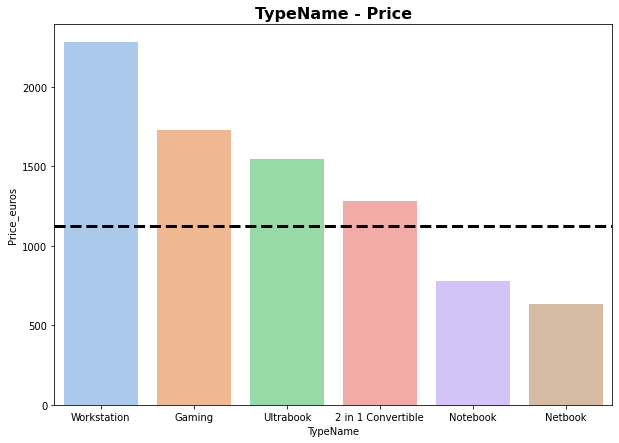

In [75]:
type = pd.DataFrame(df.groupby('TypeName')['Price_euros'].mean()).reset_index().sort_values('Price_euros', ascending = False)

plt.figure(figsize = (10, 7))
sns.barplot(x = 'TypeName', y = 'Price_euros', data = type, palette = 'pastel')
plt.title('TypeName - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

3. Inches

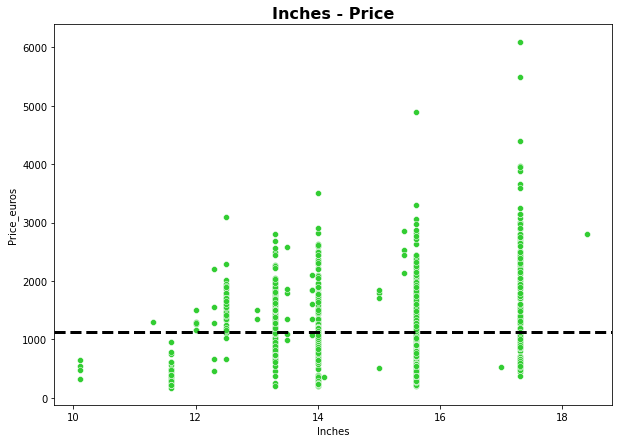

In [79]:
inch = df.loc[:, ['Inches', 'Price_euros']]

plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'Inches', y = 'Price_euros', data = inch, color = 'limegreen')
plt.title('Inches - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

Screen

In [51]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

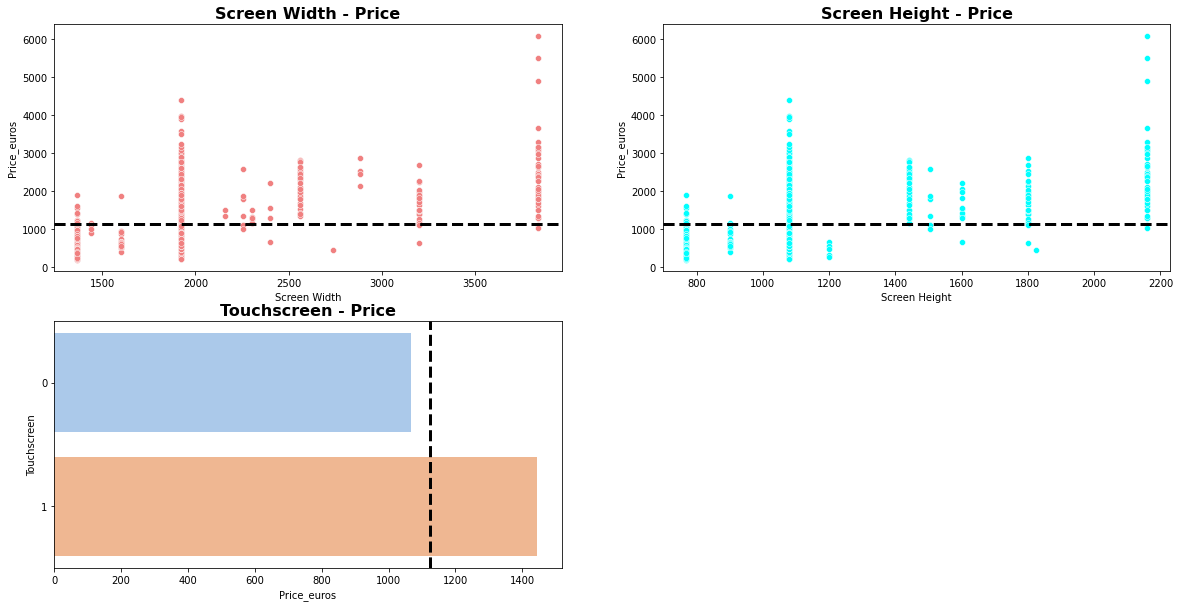

In [88]:
screen = df.loc[:, ['Screen Width', 'Screen Height', 'Price_euros']]
touchscreen = df.groupby('Touchscreen')['Price_euros'].mean().reset_index().sort_values('Price_euros', ascending = False)

plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.scatterplot(x = 'Screen Width', y = 'Price_euros', data = screen, color = 'lightcoral')
plt.title('Screen Width - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

plt.subplot(222)
sns.scatterplot(x = 'Screen Height', y = 'Price_euros', data = screen, color = 'aqua')
plt.title('Screen Height - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

plt.subplot(223)
sns.barplot(x = 'Price_euros', y = 'Touchscreen', data = touchscreen, orient = 'h', palette = 'pastel')
plt.title('Touchscreen - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axvline(x = mean, color = 'black', linestyle = '--', linewidth = 3)

Cpu

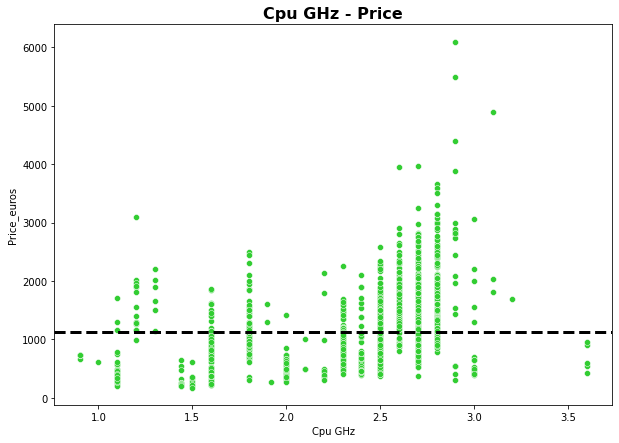

In [89]:
cpu = df.loc[:, ['Cpu GHz', 'Price_euros']]

plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'Cpu GHz', y = 'Price_euros', data = cpu, color = 'limegreen')
plt.title('Cpu GHz - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

Ram

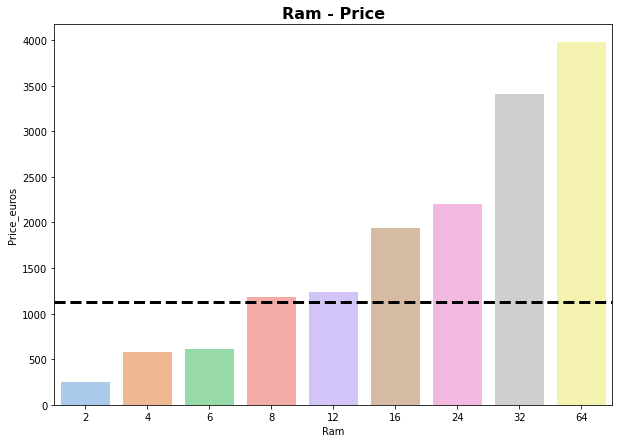

In [95]:
ram = pd.DataFrame(df.groupby('Ram')['Price_euros'].mean()).reset_index().sort_values('Price_euros', ascending = False)

plt.figure(figsize = (10, 7))
sns.barplot(x = 'Ram', y = 'Price_euros', data = ram, palette = 'pastel')
plt.title('Ram - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

Memory

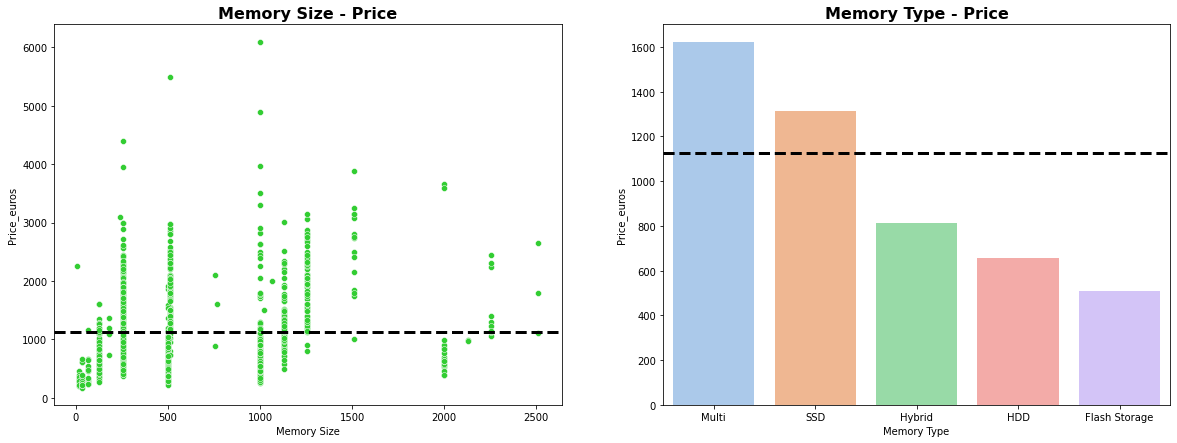

In [105]:
msize = df.loc[:, ['Memory Size', 'Price_euros']]
mtype = pd.DataFrame(df.groupby('Memory Type')['Price_euros'].mean()).reset_index().sort_values('Price_euros', ascending = False)

plt.figure(figsize = (20, 7))
plt.subplot(121)
sns.scatterplot(x = 'Memory Size', y = 'Price_euros', data = msize, color = 'limegreen')
plt.title('Memory Size - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

plt.subplot(122)
sns.barplot(x = 'Memory Type', y = 'Price_euros', data = mtype, palette = 'pastel')
plt.title('Memory Type - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

In [104]:
df

,Company,TypeName,Inches,Screen Width,Screen Height,Touchscreen,Cpu GHz,Ram,Memory Size,Memory Type,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,2560,1600,0,2.3,8,128,SSD,Intel,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440,900,0,1.8,8,128,Flash Storage,Intel,macOS,1.34,898.94
2,HP,Notebook,15.6,1920,1080,0,2.5,8,256,SSD,Intel,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,2880,1800,0,2.7,16,512,SSD,AMD,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,2560,1600,0,3.1,8,256,SSD,Intel,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920,1080,1,2.5,4,128,SSD,Intel,Windows 10,1.80,638.00
1299,Lenovo,2 in 1 Convertible,13.3,3200,1800,1,2.5,16,512,SSD,Intel,Windows 10,1.30,1499.00
1300,Lenovo,Notebook,14.0,1366,768,0,1.6,2,64,Flash Storage,Intel,Windows 10,1.50,229.00
1301,HP,Notebook,15.6,1366,768,0,2.5,6,1000,HDD,AMD,Windows 10,2.19,764.00


Gpu, OpSys, Weight

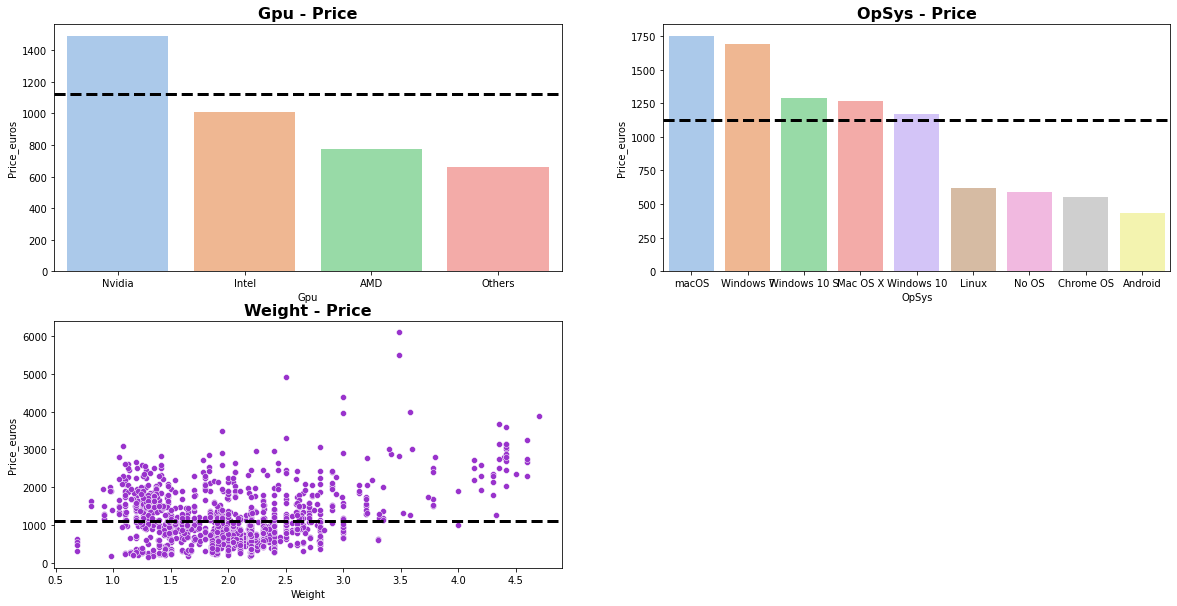

In [106]:
gpu = pd.DataFrame(df.groupby('Gpu')['Price_euros'].mean()).reset_index().sort_values('Price_euros', ascending = False)
sys = pd.DataFrame(df.groupby('OpSys')['Price_euros'].mean()).reset_index().sort_values('Price_euros', ascending = False)
weight = df.loc[:, ['Weight', 'Price_euros']]

plt.figure(figsize = (20, 10))

plt.subplot(221)
sns.barplot(x = 'Gpu', y = 'Price_euros', data = gpu, palette = 'pastel')
plt.title('Gpu - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

plt.subplot(222)
sns.barplot(x = 'OpSys', y = 'Price_euros', data = sys, palette = 'pastel')
plt.title('OpSys - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)

plt.subplot(223)
sns.scatterplot(x = 'Weight', y = 'Price_euros', data = weight, color = 'darkorchid')
plt.title('Weight - Price', fontdict = {'fontsize' : 16, 'fontweight' : 'bold'})
plt.axhline(y = mean, color = 'black', linestyle = '--', linewidth = 3)